In [2]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd

class Agent:

    def __init__(self, alpha=0.05, beta=10**(-5), delta=0.99, no_exploration=False):
        self.A = ['c', 'd']

        self.no_exploration=no_exploration

        if self.no_exploration: 
            self.epsilon=0
        else:
            self.epsilon = 1
        self.alpha = alpha
        self.beta = beta
        self.delta = delta
        

        self.s_ind = None
        self.s_t = None
        self.a_ind = None
        self.a = None
        self.s_ind1 = None
        self.s_t1 = None

        self.Q = np.random.uniform(size=(2, 4), low=-0.5, high=0.5)
        self.Q_count = np.zeros((2, 4))


    def get_next_action(self):
        if np.random.random() < 1-self.epsilon:
            self.a_ind = self.Q[:, self.s_ind].argmax()
        else:
            self.a_ind = np.random.randint(2)
        
        self.a = self.A[self.a_ind]


    def updateQ(self, reward, t):  # upateQ
        
        self.Q[self.a_ind, self.s_ind] = (
                1-self.alpha)*self.Q[self.a_ind, self.s_ind] + self.alpha*(reward + self.delta*self.Q[:, self.s_ind1].max())
        self.Q_count[self.a_ind, self.s_ind] += 1

        self.s_ind = self.s_ind1
        if not self.no_exploration:
            self.epsilon = np.exp(-self.beta*t)


class Env:
    def __init__(self, r_dd=-2, r_cd=-3, r_cc=-1, r_dc=0):
        self.r_dd = r_dd
        self.r_cd = r_cd
        self.r_cc = r_cc
        self.r_dc = r_dc

    def __call__(self, action1, action2):
        if action1+action2 == 'dd':
            return self.r_dd, 0
        elif action1+action2 == 'cd':
            return self.r_cd, 1
        elif action1+action2 == 'cc':
            return self.r_cc, 2
        elif action1+action2 == 'dc':
            return self.r_dc, 3
        else: 
            raise ValueError("Actions should be 'd' or 'c'")
        


In [ ]:
import matplotlib.pyplot as plt

# i) Pour un $\beta$ assez grand, toujours de la convergence à 100 000 itération car les cellules sont visitées assez de fois rien qu'avec le processus d'optimisation (et ce même sans exploration)

In [40]:
rewards1_plot = []
rewards2_plot = []

Q_count_plot = []

for beta in [10**(-4), 1, 10**(8)]:
    all_reward_mean1 = []
    all_reward_mean2 = []
    for loop in range(30): 
        print('beta', beta, 'loop',loop)   
        agent1 = Agent(beta=beta)
        agent2 = Agent(beta=beta)
        environment = Env()

        all_reward1 = []
        all_reward2 = []

        iteration = []

        agent1.get_next_action()
        agent2.get_next_action()
        

        reward1, agent1.s_ind = environment(agent1.a, agent2.a)
        reward2, agent2.s_ind = environment(agent1.a, agent2.a)

        for t in range(100000):
            agent1.updateQ(reward1, t)
            agent2.updateQ(reward2, t)

            agent1.get_next_action()
            agent2.get_next_action()

            reward1, agent1.s_ind1 = environment(agent1.a, agent2.a)
            reward2, agent2.s_ind1 = environment(agent2.a, agent1.a)

            all_reward1.append(reward1)
            all_reward2.append(reward2)

            iteration.append(t)
        Q_count = np.concatenate([agent1.Q_count, agent2.Q_count], axis=1)
        Q_count = pd.DataFrame(Q_count)
        Q_count['beta']=beta 
        Q_count['index']=loop

        Q_count_plot.append(Q_count)

        all_reward_mean1.append(all_reward1)
        all_reward_mean2.append(all_reward2)
    


    mean_reward1 = np.mean(all_reward_mean1, axis=0)
    mean_reward2 = np.mean(all_reward_mean2, axis=0)

    rewards1_plot.append(mean_reward1)
    rewards2_plot.append(mean_reward2)

beta 0.0001 loop 0
beta 0.0001 loop 1
beta 0.0001 loop 2
beta 0.0001 loop 3
beta 0.0001 loop 4
beta 0.0001 loop 5
beta 0.0001 loop 6
beta 0.0001 loop 7
beta 0.0001 loop 8
beta 0.0001 loop 9
beta 0.0001 loop 10
beta 0.0001 loop 11
beta 0.0001 loop 12
beta 0.0001 loop 13
beta 0.0001 loop 14
beta 0.0001 loop 15
beta 0.0001 loop 16
beta 0.0001 loop 17
beta 0.0001 loop 18
beta 0.0001 loop 19
beta 0.0001 loop 20
beta 0.0001 loop 21
beta 0.0001 loop 22
beta 0.0001 loop 23
beta 0.0001 loop 24
beta 0.0001 loop 25
beta 0.0001 loop 26
beta 0.0001 loop 27
beta 0.0001 loop 28
beta 0.0001 loop 29
beta 1 loop 0
beta 1 loop 1
beta 1 loop 2
beta 1 loop 3
beta 1 loop 4
beta 1 loop 5
beta 1 loop 6
beta 1 loop 7
beta 1 loop 8
beta 1 loop 9
beta 1 loop 10
beta 1 loop 11
beta 1 loop 12
beta 1 loop 13
beta 1 loop 14
beta 1 loop 15
beta 1 loop 16
beta 1 loop 17
beta 1 loop 18
beta 1 loop 19
beta 1 loop 20
beta 1 loop 21
beta 1 loop 22
beta 1 loop 23
beta 1 loop 24
beta 1 loop 25
beta 1 loop 26
beta 1 loop 27


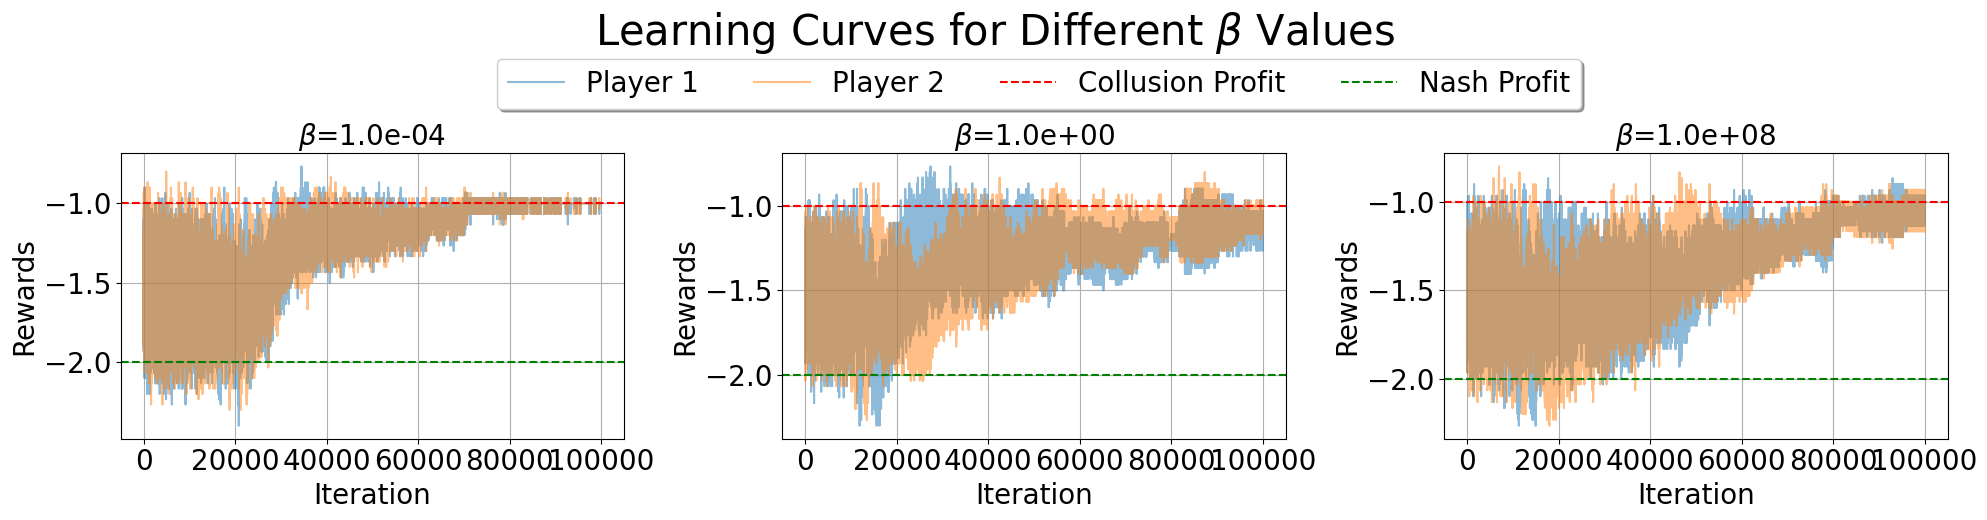

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
fig.suptitle('Learning Curves for Different $\\beta$ Values', fontsize=30,y=1.03)
# Flatten the axes for easier indexing
axes = axes.flatten()
betas = [10**(-4), 1, 10**(8)]
for i in range(len(rewards1_plot)):
    beta = betas[i]
    axes[i].plot(iteration, rewards1_plot[i], alpha=0.5, label='Player 1')
    axes[i].plot(iteration, rewards2_plot[i], alpha=0.5, label='Player 2')
    axes[i].axhline(y=-1, color='r', linestyle='--', label='Collusion Profit')
    axes[i].axhline(y=-2, color='g', linestyle='--', label='Nash Profit')
    axes[i].set_ylabel('Rewards', fontsize=20)
    axes[i].set_title(f"$\\beta$={'{:.1e}'.format(beta)}", size=20)
    axes[i].set_xlabel('Iteration', fontsize=20)
    axes[i].xaxis.set_tick_params(labelsize=20)
    axes[i].xaxis.get_offset_text().set_fontsize(20)
    axes[i].yaxis.set_tick_params(labelsize=20)
    axes[i].grid(True)

# Adjust layout for subplots
plt.tight_layout(rect=[0, 0, 1, 0.96])


# Create a combined legend using the axes of the last subplot
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.8, 0.96),fancybox=True, shadow=True, ncol=4, fontsize=20)


plt.show()

## save to csv 

In [42]:
# Create a list of indices
indices = [i for i, sublist in enumerate(rewards1_plot) for _ in sublist]

iterations = np.concatenate([iteration, iteration, iteration], axis = 0)

# Flatten the list of lists
flat_rewards1 = [item for sublist in rewards1_plot for item in sublist]
flat_rewards2 = [item for sublist in rewards2_plot for item in sublist]


# Create DataFrame
df = pd.DataFrame({'iteration': iterations, 'rewards1': flat_rewards1, 'rewards2': flat_rewards2})
df['number'] = df.index // 1000000

betas = [10**(-4), 1, 10**(8)]
df['beta']=df['number'].map(lambda x: betas[x] if 0 <= x <= len(betas)-1 else None)

df = df.drop(columns='number')

df.to_csv('../PrisonnerDilemma/PrisonnersDilemmaDatas/data_large_beta_i', index=False)

In [43]:
Q_count_all = pd.concat(Q_count_plot, ignore_index=True)
Q_count_all

,0,1,2,3,4,5,6,7,beta,index
0,4035.0,2380.0,75643.0,2021.0,3847.0,2243.0,75611.0,2098.0,1.000000e-04,0
1,6426.0,3365.0,2689.0,3444.0,6614.0,3223.0,2721.0,3646.0,1.000000e-04,0
2,3665.0,3555.0,73609.0,2376.0,3504.0,2332.0,73093.0,3356.0,1.000000e-04,1
3,7286.0,3211.0,2831.0,3470.0,7447.0,3513.0,3347.0,3411.0,1.000000e-04,1
4,4459.0,3222.0,70774.0,2195.0,4053.0,2337.0,70555.0,2813.0,1.000000e-04,2
...,...,...,...,...,...,...,...,...,...,...
175,18695.0,4375.0,3203.0,5363.0,18821.0,3978.0,2610.0,6844.0,1.000000e+08,27
176,4873.0,3351.0,41113.0,6117.0,7599.0,6576.0,42788.0,3116.0,1.000000e+08,28
177,26445.0,5254.0,5734.0,7116.0,23719.0,6657.0,4059.0,5489.0,1.000000e+08,28
178,5051.0,3066.0,36351.0,7419.0,8906.0,7474.0,38620.0,3148.0,1.000000e+08,29


In [44]:
for i in range(0, len(Q_count_all), 2):
    Q_count_all['action'] = Q_count_all.index % 2

In [45]:
Q_count_all = Q_count_all.melt(id_vars=['action','beta','index'], var_name='state')

In [46]:
Q_count_all

,action,beta,index,state,value
0,0,1.000000e-04,0,0,4035.0
1,1,1.000000e-04,0,0,6426.0
2,0,1.000000e-04,1,0,3665.0
3,1,1.000000e-04,1,0,7286.0
4,0,1.000000e-04,2,0,4459.0
...,...,...,...,...,...
1435,1,1.000000e+08,27,7,6844.0
1436,0,1.000000e+08,28,7,3116.0
1437,1,1.000000e+08,28,7,5489.0
1438,0,1.000000e+08,29,7,3148.0


In [47]:
Q_count_all.loc[(Q_count_all['state'] > 3) , 'state'] = Q_count_all['state'] - 4

In [48]:
Q_count_all.rename(columns={'value': "number of time visited (mean)"}, inplace=True)
Q_count_all

,action,beta,index,state,number of time visited (mean)
0,0,1.000000e-04,0,0,4035.0
1,1,1.000000e-04,0,0,6426.0
2,0,1.000000e-04,1,0,3665.0
3,1,1.000000e-04,1,0,7286.0
4,0,1.000000e-04,2,0,4459.0
...,...,...,...,...,...
1435,1,1.000000e+08,27,3,6844.0
1436,0,1.000000e+08,28,3,3116.0
1437,1,1.000000e+08,28,3,5489.0
1438,0,1.000000e+08,29,3,3148.0


In [49]:
from matplotlib.legend_handler import HandlerBase
class HandlerBoxPlot(HandlerBase):
    def create_artists(self, legend, orig_handle,
                   xdescent, ydescent, width, height, fontsize,
                   trans):
        a_list = []
        a_list.append(Line2D(np.array([0, 0, 1, 1, 0])*width-xdescent, 
                                              np.array([0.25, 0.75, 0.75, 0.25, 0.25])*height-ydescent)) # box

        a_list.append(Line2D(np.array([0.5,0.5])*width-xdescent,
                                              np.array([0.75,1])*height-ydescent)) # top vert line

        a_list.append(Line2D(np.array([0.5,0.5])*width-xdescent,
                                              np.array([0.25,0])*height-ydescent)) # bottom vert line

        a_list.append(Line2D(np.array([0.25,0.75])*width-xdescent,
                                              np.array([1,1])*height-ydescent)) # top whisker

        a_list.append(Line2D(np.array([0.25,0.75])*width-xdescent,
                                              np.array([0,0])*height-ydescent)) # bottom whisker

        a_list.append(Line2D(np.array([0,1])*width-xdescent,
                                              np.array([0.5,0.5])*height-ydescent, lw=2)) # median
        for a in a_list:
            a.set_color(orig_handle.get_color())
        return a_list

In [61]:
from matplotlib.lines import Line2D
def repart_count(df_beta, title='Box Plots of number of visits by cells for Different $\\beta$ values for 1e5 iterations'):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 7))
    
    # Sort the dataframe by 'beta' column in ascending order
    df_beta_sorted = df_beta.sort_values(by='beta')

    
    sns.boxplot(x='beta', y=df_beta_sorted["number of time visited (mean)"], color='g', data=df_beta_sorted, fill=False, order=df_beta_sorted['beta'],log_scale=True)

    plt.axhline(y=10**2, color='black', linestyle='--', label='Collusion Profits')
    plt.xlabel('Beta', fontsize=15)
    plt.ylabel('Number of visits', fontsize=15)
    plt.title(title, fontsize=15, y=1.1)
    # Ajouter la légende manuellement
    
    # Define custom tick labels for the x-axis
    beta_values = df_beta_sorted['beta'].unique()
    beta_labels = ['{:.1e}'.format(beta) for beta in beta_values]

    #Define the legend
    l1 = Line2D([0], [0], color='g')

    plt.legend([l1], ["number of time visited (mean)"], handler_map={l1:HandlerBoxPlot(),}, handleheight=3, bbox_to_anchor=(0.7,1.1), ncol=2, fontsize=10)
    plt.xlabel('$\\beta$')
    # Set custom tick positions and labels on the x-axis and y-axis
    plt.xticks(ticks=range(len(beta_values)), labels=beta_labels, rotation=45, fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

In [59]:
import seaborn as sns

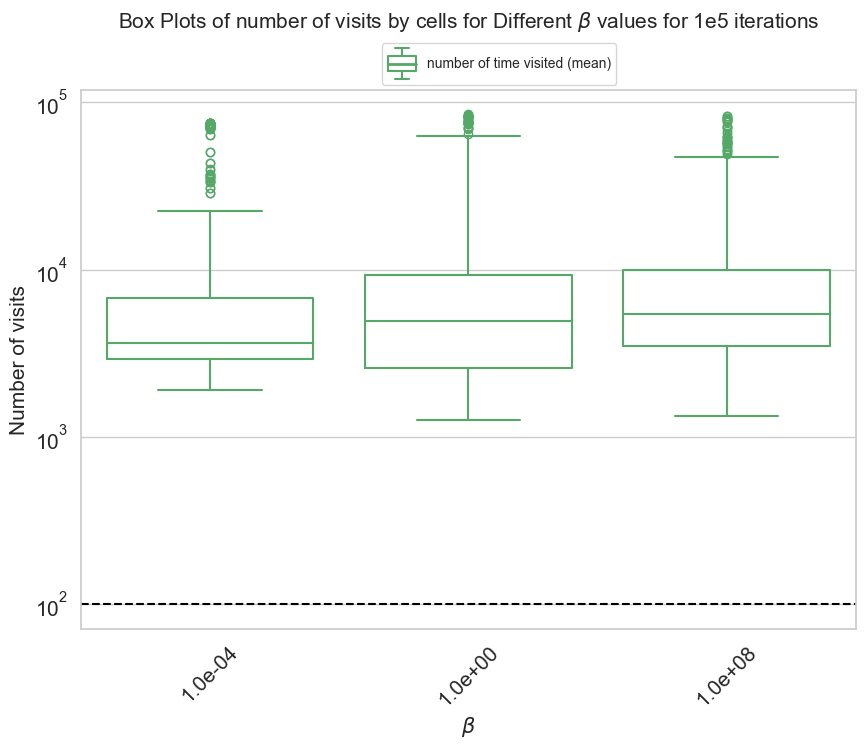

In [62]:
repart_count(Q_count_all)

## save csv 

In [63]:
Q_count_all.to_csv('../PrisonnerDilemma/PrisonnersDilemmaDatas/Q_count_large_beta_i', index=False)

# ii) Pour des $\beta$ trop petits pas de convergence pour 100000 itérations car la probabilité de choisir une action aléatoire est encore trop importante après 100 000 itération (résultat que l'on retrouve avec CALVANO) => il faudrait plus d'itérations pour obtenir des résultats collusifs

In [6]:
rewards1_plot = []
rewards2_plot = []

Q_count_plot = []

for beta in [10**(-6), 10**(-5), 10**(-4)]:
    all_reward_mean1 = []
    all_reward_mean2 = []
    for loop in range(30): 
        print('beta', beta, 'loop',loop)   
        agent1 = Agent(beta=beta)
        agent2 = Agent(beta=beta)
        environment = Env()

        all_reward1 = []
        all_reward2 = []

        iteration = []

        agent1.get_next_action()
        agent2.get_next_action()
        

        reward1, agent1.s_ind = environment(agent1.a, agent2.a)
        reward2, agent2.s_ind = environment(agent1.a, agent2.a)

        for t in range(10**(6)):
            agent1.updateQ(reward1, t)
            agent2.updateQ(reward2, t)

            agent1.get_next_action()
            agent2.get_next_action()

            reward1, agent1.s_ind1 = environment(agent1.a, agent2.a)
            reward2, agent2.s_ind1 = environment(agent2.a, agent1.a)

            all_reward1.append(reward1)
            all_reward2.append(reward2)

            iteration.append(t)
        Q_count = np.concatenate([agent1.Q_count, agent2.Q_count], axis=1)
        Q_count = pd.DataFrame(Q_count)
        Q_count['beta']=beta 
        Q_count['index']=loop

        Q_count_plot.append(Q_count)

        all_reward_mean1.append(all_reward1)
        all_reward_mean2.append(all_reward2)
    


    mean_reward1 = np.mean(all_reward_mean1, axis=0)
    mean_reward2 = np.mean(all_reward_mean2, axis=0)

    rewards1_plot.append(mean_reward1)
    rewards2_plot.append(mean_reward2)

beta 1e-06 loop 0
beta 1e-06 loop 1
beta 1e-06 loop 2
beta 1e-06 loop 3
beta 1e-06 loop 4
beta 1e-06 loop 5
beta 1e-06 loop 6
beta 1e-06 loop 7
beta 1e-06 loop 8
beta 1e-06 loop 9
beta 1e-06 loop 10
beta 1e-06 loop 11
beta 1e-06 loop 12
beta 1e-06 loop 13
beta 1e-06 loop 14
beta 1e-06 loop 15
beta 1e-06 loop 16
beta 1e-06 loop 17
beta 1e-06 loop 18
beta 1e-06 loop 19
beta 1e-06 loop 20
beta 1e-06 loop 21
beta 1e-06 loop 22
beta 1e-06 loop 23
beta 1e-06 loop 24
beta 1e-06 loop 25
beta 1e-06 loop 26
beta 1e-06 loop 27
beta 1e-06 loop 28
beta 1e-06 loop 29
beta 1e-05 loop 0
beta 1e-05 loop 1
beta 1e-05 loop 2
beta 1e-05 loop 3
beta 1e-05 loop 4
beta 1e-05 loop 5
beta 1e-05 loop 6
beta 1e-05 loop 7
beta 1e-05 loop 8
beta 1e-05 loop 9
beta 1e-05 loop 10
beta 1e-05 loop 11
beta 1e-05 loop 12
beta 1e-05 loop 13
beta 1e-05 loop 14
beta 1e-05 loop 15
beta 1e-05 loop 16
beta 1e-05 loop 17
beta 1e-05 loop 18
beta 1e-05 loop 19
beta 1e-05 loop 20
beta 1e-05 loop 21
beta 1e-05 loop 22
beta 1e-05 lo

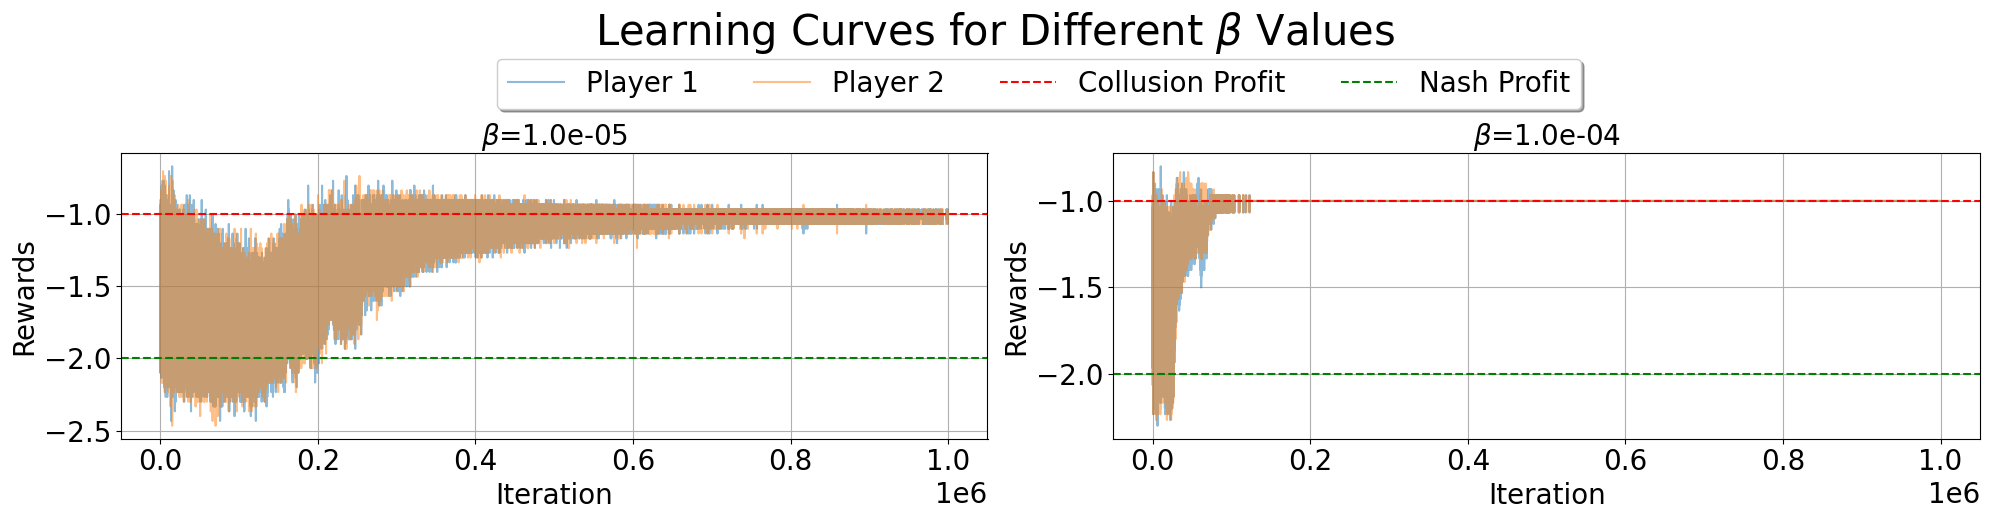

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
fig.suptitle('Learning Curves for Different $\\beta$ Values', fontsize=30,y=1.03)
# Flatten the axes for easier indexing
axes = axes.flatten()
betas = [10**(-5), 10**(-4)]
for j in range(1,len(rewards1_plot)):
    i = j-1
    beta = betas[i]
    axes[i].plot(iteration, rewards1_plot[j], alpha=0.5, label='Player 1')
    axes[i].plot(iteration, rewards2_plot[j], alpha=0.5, label='Player 2')
    axes[i].axhline(y=-1, color='r', linestyle='--', label='Collusion Profit')
    axes[i].axhline(y=-2, color='g', linestyle='--', label='Nash Profit')
    axes[i].set_ylabel('Rewards', fontsize=20)
    axes[i].set_title(f"$\\beta$={'{:.1e}'.format(beta)}", size=20)
    axes[i].set_xlabel('Iteration', fontsize=20)
    axes[i].xaxis.set_tick_params(labelsize=20)
    axes[i].xaxis.get_offset_text().set_fontsize(20)
    axes[i].yaxis.set_tick_params(labelsize=20)
    axes[i].grid(True)

# Adjust layout for subplots
plt.tight_layout(rect=[0, 0, 1, 0.96])


# Create a combined legend using the axes of the last subplot
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.8, 0.96),fancybox=True, shadow=True, ncol=4, fontsize=20)


plt.show()

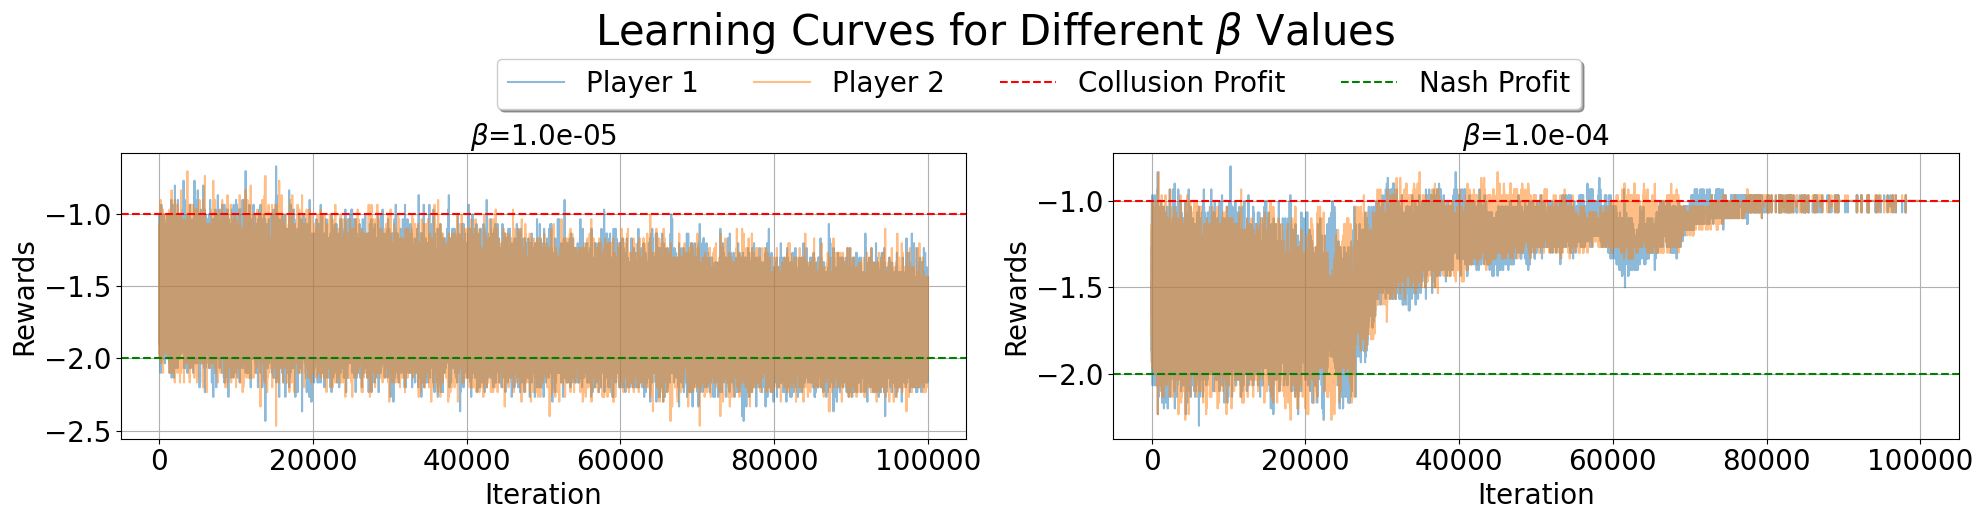

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
fig.suptitle('Learning Curves for Different $\\beta$ Values', fontsize=30,y=1.03)
# Flatten the axes for easier indexing
axes = axes.flatten()
betas = [10**(-5), 10**(-4)]
for j in range(1,len(rewards1_plot)):
    i = j-1
    beta = betas[i]
    axes[i].plot(iteration[:100000], rewards1_plot[j][:100000], alpha=0.5, label='Player 1')
    axes[i].plot(iteration[:100000], rewards2_plot[j][:100000], alpha=0.5, label='Player 2')
    axes[i].axhline(y=-1, color='r', linestyle='--', label='Collusion Profit')
    axes[i].axhline(y=-2, color='g', linestyle='--', label='Nash Profit')
    axes[i].set_ylabel('Rewards', fontsize=20)
    axes[i].set_title(f"$\\beta$={'{:.1e}'.format(beta)}", size=20)
    axes[i].set_xlabel('Iteration', fontsize=20)
    axes[i].xaxis.set_tick_params(labelsize=20)
    axes[i].xaxis.get_offset_text().set_fontsize(20)
    axes[i].yaxis.set_tick_params(labelsize=20)
    axes[i].grid(True)

# Adjust layout for subplots
plt.tight_layout(rect=[0, 0, 1, 0.96])


# Create a combined legend using the axes of the last subplot
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.8, 0.96),fancybox=True, shadow=True, ncol=4, fontsize=20)


plt.show()

In [12]:
# Create a list of indices
indices = [i for i, sublist in enumerate(rewards1_plot) for _ in sublist]

betas = [10**(-6), 10**(-5), 10**(-4)]

iterations = np.concatenate([iteration, iteration, iteration], axis = 0)

# Flatten the list of lists
flat_rewards1 = [item for sublist in rewards1_plot for item in sublist]
flat_rewards2 = [item for sublist in rewards2_plot for item in sublist]

print(len(iterations), len(flat_rewards1))

# Create DataFrame
df = pd.DataFrame({'iteration': iterations, 'rewards1': flat_rewards1, 'rewards2': flat_rewards2})
df['number'] = df.index // 1000000

3000000 3000000


## enregistrement csv

In [16]:
betas = [10**(-6), 10**(-5), 10**(-4)]
df['beta']=df['number'].map(lambda x: betas[x] if 0 <= x <= len(betas)-1 else None)

In [18]:
df = df.drop(columns='number')

In [19]:
df.to_csv('../PrisonnerDilemma/PrisonnersDilemmaDatas/data_too_small_beta_ii', index=False)

# iii) Pour des beta différents, si les $\beta$ sont assez grand il y a une convergence des résultats, en revanche si l'un des $\beta$ est trop petit, il n'y en a pas 

In [31]:
rewards1_plot = []
rewards2_plot = []

Q_count_plot = []

for beta in [10**(-6), 10**(-5), 10**(-4)]:
    all_reward_mean1 = []
    all_reward_mean2 = []
    for loop in range(30): 
        print('beta', beta, 'loop',loop)   
        agent1 = Agent(beta=beta)
        agent2 = Agent(beta=1)
        environment = Env()

        all_reward1 = []
        all_reward2 = []

        iteration = []

        agent1.get_next_action()
        agent2.get_next_action()
        

        reward1, agent1.s_ind = environment(agent1.a, agent2.a)
        reward2, agent2.s_ind = environment(agent1.a, agent2.a)

        for t in range(10**(5)):
            agent1.updateQ(reward1, t)
            agent2.updateQ(reward2, t)

            agent1.get_next_action()
            agent2.get_next_action()

            reward1, agent1.s_ind1 = environment(agent1.a, agent2.a)
            reward2, agent2.s_ind1 = environment(agent2.a, agent1.a)

            all_reward1.append(reward1)
            all_reward2.append(reward2)

            iteration.append(t)
        Q_count = np.concatenate([agent1.Q_count, agent2.Q_count], axis=1)
        Q_count = pd.DataFrame(Q_count)
        Q_count['beta']=beta 
        Q_count['index']=loop

        Q_count_plot.append(Q_count)

        all_reward_mean1.append(all_reward1)
        all_reward_mean2.append(all_reward2)
    


    mean_reward1 = np.mean(all_reward_mean1, axis=0)
    mean_reward2 = np.mean(all_reward_mean2, axis=0)

    rewards1_plot.append(mean_reward1)
    rewards2_plot.append(mean_reward2)

beta 1e-06 loop 0
beta 1e-06 loop 1
beta 1e-06 loop 2
beta 1e-06 loop 3
beta 1e-06 loop 4
beta 1e-06 loop 5
beta 1e-06 loop 6
beta 1e-06 loop 7
beta 1e-06 loop 8
beta 1e-06 loop 9
beta 1e-06 loop 10
beta 1e-06 loop 11
beta 1e-06 loop 12
beta 1e-06 loop 13
beta 1e-06 loop 14
beta 1e-06 loop 15
beta 1e-06 loop 16
beta 1e-06 loop 17
beta 1e-06 loop 18
beta 1e-06 loop 19
beta 1e-06 loop 20
beta 1e-06 loop 21
beta 1e-06 loop 22
beta 1e-06 loop 23
beta 1e-06 loop 24
beta 1e-06 loop 25
beta 1e-06 loop 26
beta 1e-06 loop 27
beta 1e-06 loop 28
beta 1e-06 loop 29
beta 1e-05 loop 0
beta 1e-05 loop 1
beta 1e-05 loop 2
beta 1e-05 loop 3
beta 1e-05 loop 4
beta 1e-05 loop 5
beta 1e-05 loop 6
beta 1e-05 loop 7
beta 1e-05 loop 8
beta 1e-05 loop 9
beta 1e-05 loop 10
beta 1e-05 loop 11
beta 1e-05 loop 12
beta 1e-05 loop 13
beta 1e-05 loop 14
beta 1e-05 loop 15
beta 1e-05 loop 16
beta 1e-05 loop 17
beta 1e-05 loop 18
beta 1e-05 loop 19
beta 1e-05 loop 20
beta 1e-05 loop 21
beta 1e-05 loop 22
beta 1e-05 lo

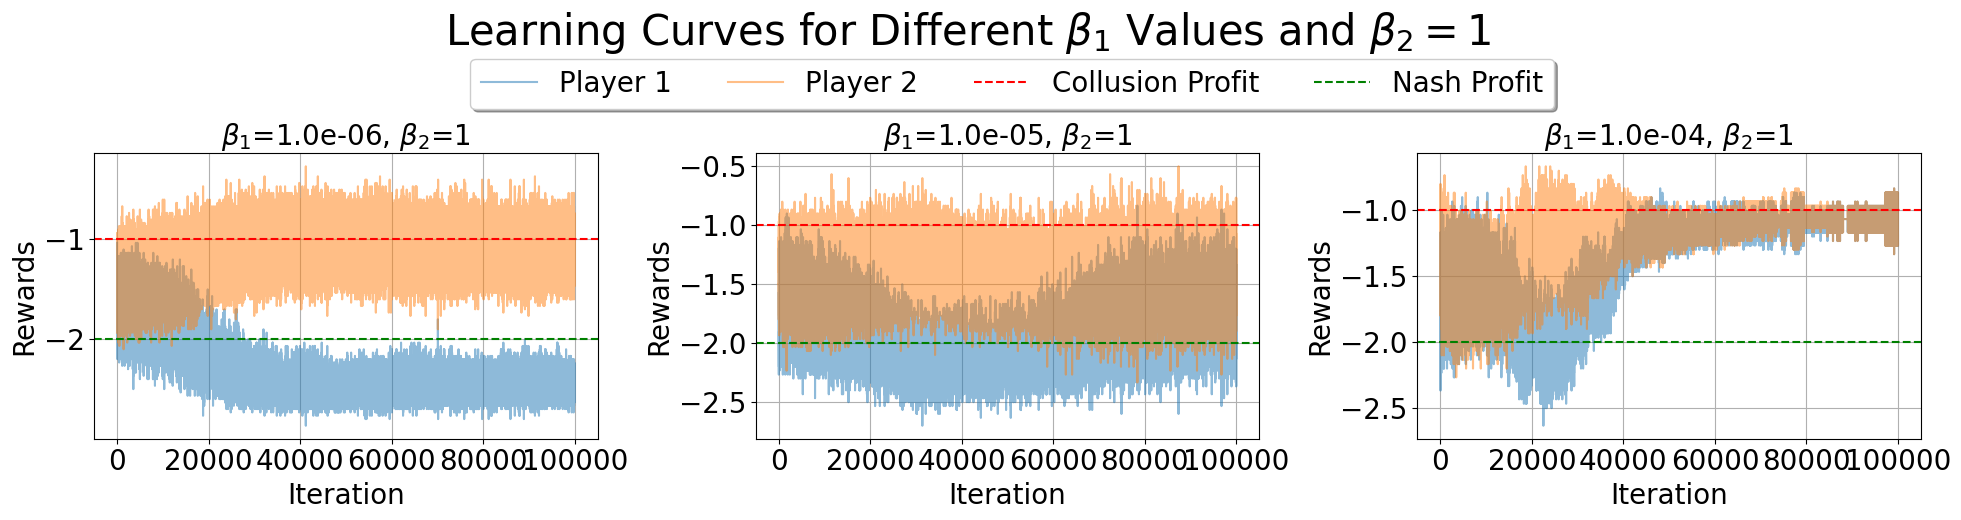

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
fig.suptitle('Learning Curves for Different $\\beta_1$ Values and $\\beta_2=1$', fontsize=30,y=1.03)
# Flatten the axes for easier indexing
axes = axes.flatten()
betas = [10**(-6), 10**(-5), 10**(-4)]
for i in range(len(rewards1_plot)):
    beta = betas[i]
    axes[i].plot(iteration, rewards1_plot[i], alpha=0.5, label='Player 1')
    axes[i].plot(iteration, rewards2_plot[i], alpha=0.5, label='Player 2')
    axes[i].axhline(y=-1, color='r', linestyle='--', label='Collusion Profit')
    axes[i].axhline(y=-2, color='g', linestyle='--', label='Nash Profit')
    axes[i].set_ylabel('Rewards', fontsize=20)
    axes[i].set_title(f"$\\beta_1$={'{:.1e}'.format(beta)}, $\\beta_2$=1", size=20)
    axes[i].set_xlabel('Iteration', fontsize=20)
    axes[i].xaxis.set_tick_params(labelsize=20)
    axes[i].xaxis.get_offset_text().set_fontsize(20)
    axes[i].yaxis.set_tick_params(labelsize=20)
    axes[i].grid(True)

# Adjust layout for subplots
plt.tight_layout(rect=[0, 0, 1, 0.96])


# Create a combined legend using the axes of the last subplot
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.8, 0.96),fancybox=True, shadow=True, ncol=4, fontsize=20)


plt.show()

In [32]:
# Create a list of indices
indices = [i for i, sublist in enumerate(rewards1_plot) for _ in sublist]

iterations = np.concatenate([iteration, iteration, iteration], axis = 0)

# Flatten the list of lists
flat_rewards1 = [item for sublist in rewards1_plot for item in sublist]
flat_rewards2 = [item for sublist in rewards2_plot for item in sublist]


# Create DataFrame
df = pd.DataFrame({'iteration': iterations, 'rewards1': flat_rewards1, 'rewards2': flat_rewards2})
df['number'] = df.index // 1000000

betas = [10**(-6), 10**(-5), 10**(-4)]
df['beta']=df['number'].map(lambda x: betas[x] if 0 <= x <= len(betas)-1 else None)

df = df.drop(columns='number')

df.to_csv('../PrisonnerDilemma/PrisonnersDilemmaDatas/data_different_beta_iii', index=False)

300000 300000


# Conclusion: il est facile d'obtenir de l'optimisation même si les deux joueurs ne se concertent pas: ils ont juste à fixer leur optimisation à 0 : des algorithmes vraiment simples peuvent ammener à des resultats collusifs même sans communication 